#  sales data analysis

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("sales_data.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            200 non-null    object
 1   Invoice_ID      200 non-null    object
 2   Product_Name    200 non-null    object
 3   Category        200 non-null    object
 4   Quantity        200 non-null    int64 
 5   Price           200 non-null    int64 
 6   Total_Sales     200 non-null    int64 
 7   Customer_ID     200 non-null    object
 8   Payment_Method  200 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.2+ KB


In [5]:
df.head()

,Date,Invoice_ID,Product_Name,Category,Quantity,Price,Total_Sales,Customer_ID,Payment_Method
0,2024-01-01 00:00:00.000000000,INV1000,Smartphone,Electronics,1,49098,49098,CUST18,UPI
1,2024-01-01 21:49:44.924623115,INV1001,Tablet,Electronics,2,48765,97530,CUST7,Cash
2,2024-01-02 19:39:29.849246231,INV1002,Jeans,Fashion,4,460,1840,CUST2,Cash
3,2024-01-03 17:29:14.773869346,INV1003,Tablet,Electronics,2,33618,67236,CUST39,Cash
4,2024-01-04 15:18:59.698492462,INV1004,T-shirt,Fashion,2,4664,9328,CUST27,UPI


In [6]:
df.describe()

,Quantity,Price,Total_Sales
count,200.000000,200.000000,200.000000
mean,3.015000,12102.030000,36222.185000
std,1.379962,14758.015052,50919.852045
min,1.000000,229.000000,229.000000
25%,2.000000,2264.250000,4767.500000
50%,3.000000,3878.500000,14280.000000
75%,4.000000,19248.250000,43772.500000
max,5.000000,49997.000000,249985.000000


In [7]:
df.columns

Index(['Date', 'Invoice_ID', 'Product_Name', 'Category', 'Quantity', 'Price',
       'Total_Sales', 'Customer_ID', 'Payment_Method'],
      dtype='object')

In [8]:
df.isnull().sum()

Date              0
Invoice_ID        0
Product_Name      0
Category          0
Quantity          0
Price             0
Total_Sales       0
Customer_ID       0
Payment_Method    0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,Date,Invoice_ID,Product_Name,Category,Quantity,Price,Total_Sales,Customer_ID,Payment_Method
0,2024-01-01 00:00:00.000000000,INV1000,Smartphone,Electronics,1,49098,49098,CUST18,UPI
1,2024-01-01 21:49:44.924623115,INV1001,Tablet,Electronics,2,48765,97530,CUST7,Cash
2,2024-01-02 19:39:29.849246231,INV1002,Jeans,Fashion,4,460,1840,CUST2,Cash
3,2024-01-03 17:29:14.773869346,INV1003,Tablet,Electronics,2,33618,67236,CUST39,Cash
4,2024-01-04 15:18:59.698492462,INV1004,T-shirt,Fashion,2,4664,9328,CUST27,UPI


# Exploratory Data Analysis (EDA)

In [11]:
total_revenue = df["Total_Sales"].sum()
print("Total Revenue:", df["Total_Sales"].sum())


Total Revenue: 7244437


In [12]:
total_invoices = df["Invoice_ID"].nunique()


In [13]:
total_customers = df["Customer_ID"].nunique()


In [14]:
best_products = df.groupby("Product_Name")["Total_Sales"].sum().sort_values(ascending=False).head(5)


In [15]:
category_sales = df.groupby("Category")["Total_Sales"].sum().sort_values(ascending=False)


In [16]:
payment_counts = df["Payment_Method"].value_counts()


In [17]:
df["Month"] = pd.to_datetime(df["Date"]).dt.month_name()
monthly_sales = df.groupby("Month")["Total_Sales"].sum()


In [18]:
top_customers = df.groupby("Customer_ID")["Total_Sales"].sum().sort_values(ascending=False).head(5)
df.head(5)

,Date,Invoice_ID,Product_Name,Category,Quantity,Price,Total_Sales,Customer_ID,Payment_Method,Month
0,2024-01-01 00:00:00.000000000,INV1000,Smartphone,Electronics,1,49098,49098,CUST18,UPI,January
1,2024-01-01 21:49:44.924623115,INV1001,Tablet,Electronics,2,48765,97530,CUST7,Cash,January
2,2024-01-02 19:39:29.849246231,INV1002,Jeans,Fashion,4,460,1840,CUST2,Cash,January
3,2024-01-03 17:29:14.773869346,INV1003,Tablet,Electronics,2,33618,67236,CUST39,Cash,January
4,2024-01-04 15:18:59.698492462,INV1004,T-shirt,Fashion,2,4664,9328,CUST27,UPI,January


In [19]:
# 1. Overall Sales Summary
print("Total Revenue:", df["Total_Sales"].sum())
print("Total Invoices:", df["Invoice_ID"].nunique())
print("Total Customers:", df["Customer_ID"].nunique())

# 2. Best Selling Products
best_products = df.groupby("Product_Name")["Total_Sales"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:\n", best_products)

# 3. Category-wise Sales
category_sales = df.groupby("Category")["Total_Sales"].sum().sort_values(ascending=False)
print("\nSales by Category:\n", category_sales)

# 4. Payment Method Analysis
payment_counts = df["Payment_Method"].value_counts()
print("\nPayment Method Counts:\n", payment_counts)

# 5. Monthly Sales
monthly_sales = df.groupby("Month")["Total_Sales"].sum().sort_values(ascending=False)
print("\nMonthly Sales:\n", monthly_sales)

# 6. Top Customers
top_customers = df.groupby("Customer_ID")["Total_Sales"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Customers:\n", top_customers)


Total Revenue: 7244437
Total Invoices: 200
Total Customers: 49

Top 5 Products by Sales:
 Product_Name
Smartphone    2138093
Laptop        1572252
Tablet        1552704
Camera        1005768
Smartwatch     251131
Name: Total_Sales, dtype: int64

Sales by Category:
 Category
Electronics    6268817
Accessories     490573
Fashion         485047
Name: Total_Sales, dtype: int64

Payment Method Counts:
 Payment_Method
UPI            57
Debit Card     52
Cash           46
Credit Card    45
Name: count, dtype: int64

Monthly Sales:
 Month
January     1443709
May         1430654
April       1181917
June        1150446
February    1072267
March        965444
Name: Total_Sales, dtype: int64

Top 5 Customers:
 Customer_ID
CUST39    367185
CUST11    364732
CUST18    363814
CUST43    361005
CUST20    345510
Name: Total_Sales, dtype: int64


# visualization

# Best Selling Products (Bar Chart)

C:\Users\gonda\AppData\Local\Temp\ipykernel_9912\708407496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_products.values, y=best_products.index, palette="viridis")


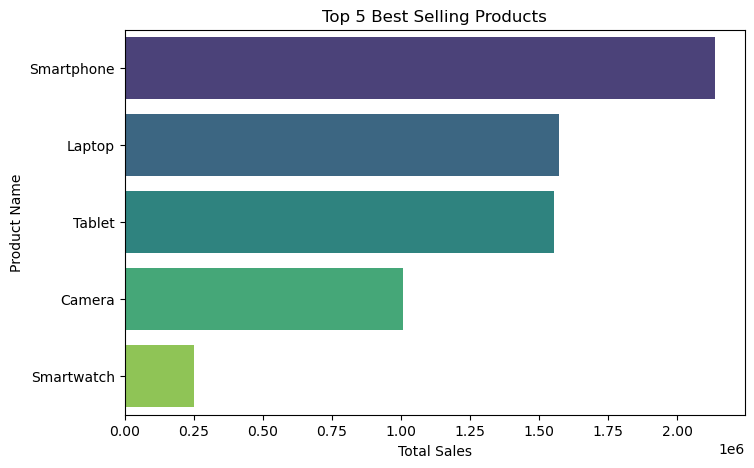

In [20]:
# Top 5 Products by Sales
best_products = df.groupby("Product_Name")["Total_Sales"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=best_products.values, y=best_products.index, palette="viridis")
plt.title("Top 5 Best Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()


# Category-wise Sales (Bar Chart)

C:\Users\gonda\AppData\Local\Temp\ipykernel_9912\2733312931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma")


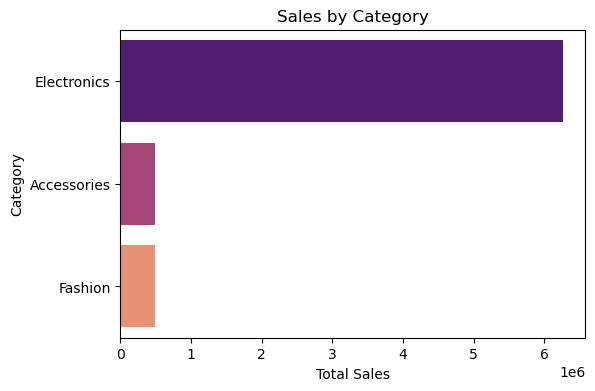

In [21]:
category_sales = df.groupby("Category")["Total_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="magma")
plt.title("Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.show()


# Payment Method Distribution (Pie Chart)

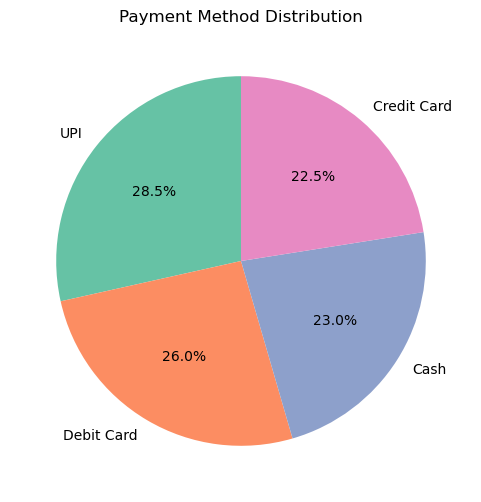

In [22]:
payment_counts = df["Payment_Method"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Payment Method Distribution")
plt.show()


# Monthly Sales Trend (Line Chart)

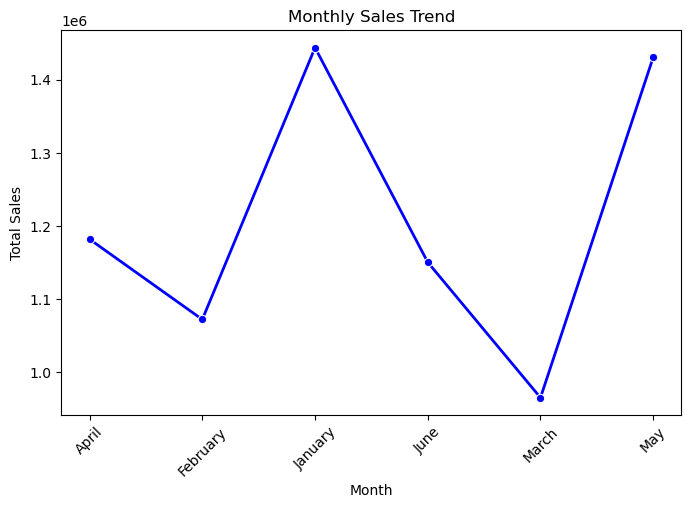

In [23]:
monthly_sales = df.groupby("Month")["Total_Sales"].sum()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linewidth=2, color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


C:\Users\gonda\AppData\Local\Temp\ipykernel_9912\1553665695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")


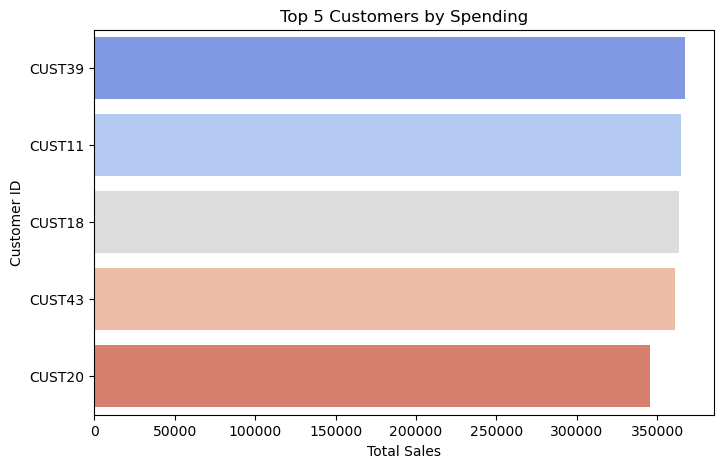

In [24]:
top_customers = df.groupby("Customer_ID")["Total_Sales"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm")
plt.title("Top 5 Customers by Spending")
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.show()


In [27]:
# Month wise sales
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.month)["Total_Sales"].sum().reset_index()
monthly_sales.columns = ["Month", "Revenue"]

print(monthly_sales)


   Month  Revenue
0      1  1443709
1      2  1072267
2      3   965444
3      4  1181917
4      5  1430654
5      6  1150446


In [28]:
# Features (X) and Target (y)
X = monthly_sales[["Month"]]   # month number as feature
y = monthly_sales["Revenue"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 316995.65
R² Score: -3.3928870786432004


In [29]:
# Predict for month = 7 (July)
future_month = [[7]]
future_sales = model.predict(future_month)
print("Predicted Sales for July:", future_sales[0])


Predicted Sales for July: 1383051.0


C:\Users\gonda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:

df.to_csv("cleaned_sales_data.csv", index=False)
